In [28]:
!pip install opendatasets

In [29]:
import pandas as pd

In [30]:
#https://huggingface.co/datasets/NebulaByte/E-Commerce_Customer_Support_Conversations

In [31]:
!pip install pyarrow
try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")
    print("Parquet file loaded successfully.")
except Exception as e:
    print(f"Error loading parquet file: {e}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Parquet file loaded successfully.


In [32]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [33]:
df.shape

(1000, 11)

In [34]:
df['issue_area'].value_counts()
len(df['issue_area'].value_counts())

6

In [35]:
df['issue_category'].unique()
len(df['issue_category'].unique())

40

In [36]:
df['issue_sub_category'].unique()
len(df['issue_sub_category'].unique())

109

In [37]:
df["issue_complexity"].value_counts()

,count
issue_complexity,
less,488
medium,426
high,86


In [38]:
df["customer_sentiment"].value_counts()

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


In [39]:
df["product_category"].value_counts()

,count
product_category,
Appliances,465
Electronics,303
Men/Women/Kids,232


In [40]:
df["agent_experience_level"].value_counts()

,count
agent_experience_level,
junior,507
experienced,348
inexperienced,145


In [41]:
df["issue_area"].value_counts()

,count
issue_area,
Cancellations and returns,286
Order,270
Login and Account,151
Shopping,116
Warranty,105
Shipping,72


In [42]:
df.loc[df['issue_complexity'].eq('high'),'agent_experience_level'].value_counts()

,count
agent_experience_level,
junior,46
experienced,31
inexperienced,9


In [ ]:
#Issue1:- for high complexity issue , experienced people should be given the task

In [43]:
df.loc[df['agent_experience_level'].eq("junior"),'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,266
negative,169
frustrated,54
positive,18


In [44]:
df.loc[df['agent_experience_level'].eq("experienced"),'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,191
negative,111
frustrated,39
positive,7


In [45]:
df.loc[df['agent_experience_level'].eq("inexperienced"),'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,95
negative,36
frustrated,12
positive,2


In [46]:
df.loc[df['agent_experience_level'].eq("junior"),'customer_sentiment'].value_counts()/df.loc[df['agent_experience_level'].eq("junior"),'customer_sentiment'].value_counts().sum() * 100

,count
customer_sentiment,
neutral,52.465483
negative,33.333333
frustrated,10.650888
positive,3.550296


In [47]:
df.loc[df['agent_experience_level'].eq("experienced"),'customer_sentiment'].value_counts()/df.loc[df['agent_experience_level'].eq("experienced"),'customer_sentiment'].value_counts().sum() * 100

,count
customer_sentiment,
neutral,54.885057
negative,31.896552
frustrated,11.206897
positive,2.011494


In [48]:
df.loc[df['agent_experience_level'].eq("inexperienced"),'customer_sentiment'].value_counts()/df.loc[df['agent_experience_level'].eq("inexperienced"),'customer_sentiment'].value_counts().sum() * 100

,count
customer_sentiment,
neutral,65.517241
negative,24.827586
frustrated,8.275862
positive,1.379310


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode 'issue_complexity'
df['issue_complexity_encoded'] = label_encoder.fit_transform(df['issue_complexity'])

# Label encode 'customer_sentiment'
df['customer_sentiment_encoded'] = label_encoder.fit_transform(df['customer_sentiment'])

df.head(10)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,2,2
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,1,2
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,2,2
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",1,2
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,2,1
5,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,2,1
6,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,frustrated,Appliances,Water Purifier,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2,0
7,Shopping,Product Availability and Status,Ordering 'Out of Stock' or 'Temporarily Unavai...,Product Availability and Status -> Ordering 'O...,neutral,Men/Women/Kids,Shoes,less,experienced,"confidently handles complex customer issues, e...","Agent: Hello, thank you for calling BrownBox C...",1,2
8,Order,Product Installation,Installation after delivery,Product Installation -> Installation after del...,negative,Electronics,DSLR Camera,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2,1
9,Login and Account,Mobile Number and Email Verification,Issues with receiving the OTP or verification ...,Mobile Number and Email Verification -> Issues...,negative,Appliances,Kitchen Chimney,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,1


In [50]:
df['customer_sentiment_encoded'].value_counts()

,count
customer_sentiment_encoded,
2,552
1,316
0,105
3,27


In [51]:
#Another method of label encoding
df['issue_complexity_encoded'] = df["issue_complexity"].map({"less": 0, "medium": 1, "high": 2})
df['customer_sentiment_encoded'] = df["customer_sentiment"].map({"negative": -1, "neutral": 0, "positive": 1, "frustrated": -2})

df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,0
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,0,0
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,1,0
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",0,0
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,1,-1


In [53]:
# Calculate the correlation matrix
correlation_matrix = df[['issue_complexity_encoded', 'customer_sentiment_encoded']].corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,issue_complexity_encoded,customer_sentiment_encoded
issue_complexity_encoded,1.000000,-0.040395
customer_sentiment_encoded,-0.040395,1.000000


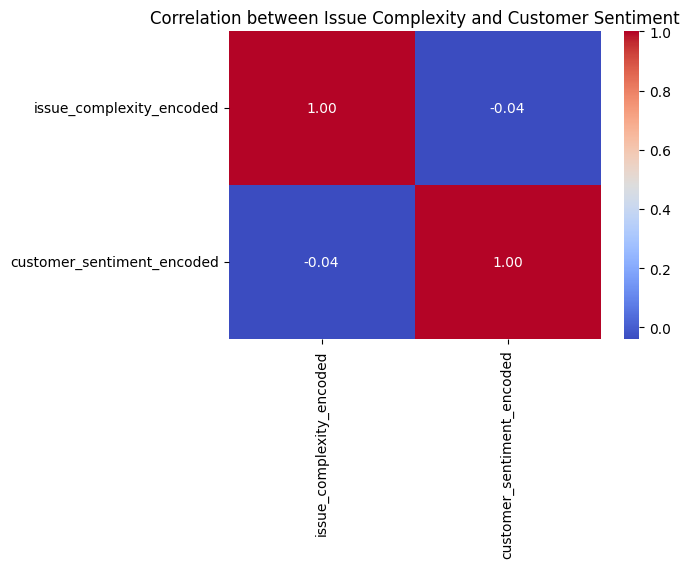

In [54]:
# heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Issue Complexity and Customer Sentiment')
plt.show()

Complexity: medium
customer_sentiment
neutral       237
negative      130
frustrated     48
positive       11
Name: count, dtype: int64
--------------------


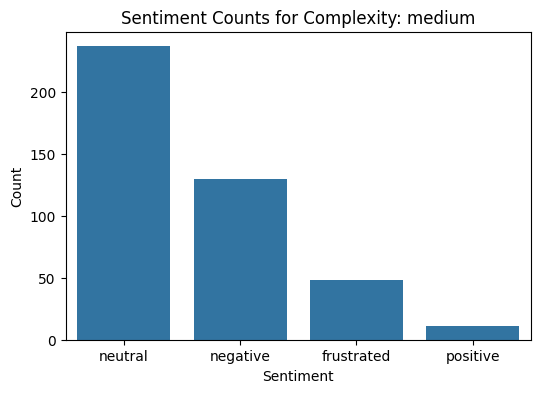

Complexity: less
customer_sentiment
neutral       274
negative      156
frustrated     45
positive       13
Name: count, dtype: int64
--------------------


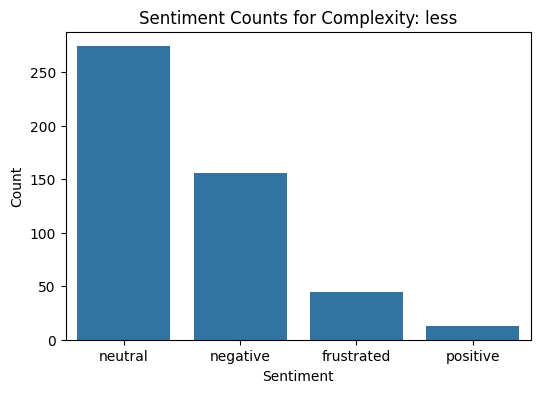

Complexity: high
customer_sentiment
neutral       41
negative      30
frustrated    12
positive       3
Name: count, dtype: int64
--------------------


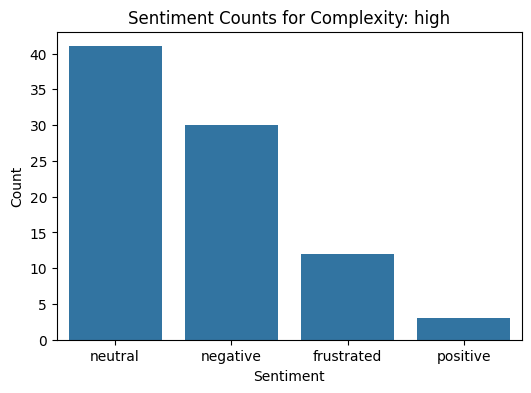

In [ ]:
for complexity in df["issue_complexity"].unique():
    print(f"Complexity: {complexity}")
    sentiment_counts = df[df["issue_complexity"] == complexity]["customer_sentiment"].value_counts()
    print(sentiment_counts)
    print("-" * 20)

    # Optional: Plotting
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title(f"Sentiment Counts for Complexity: {complexity}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

In [13]:
pip install -q -U google-generativeai

In [15]:
import google.generativeai as genai

In [24]:
import google.generativeai as genai

model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Write a story about a magic backpack.")
(response.text)

'Elara wasn\'t your typical twelve-year-old. While others dreamt of ponies and pop stars, Elara dreamt of adventure.  This yearning manifested itself in a peculiar way: a relentless curiosity that led her to rummage through dusty attics and forgotten corners of the world. It was during one such foray, in her great-aunt Mildred\'s cluttered attic, that she found it – a worn, leather backpack, smelling faintly of woodsmoke and cinnamon.\n\nThe backpack wasn\'t remarkable in its appearance.  Slightly scuffed, with tarnished brass buckles, it looked older than Elara’s grandfather. Yet, the moment she touched it, a strange warmth spread through her fingers, a tingling sensation that danced up her arm.  She slung it over her shoulders, and the world shimmered for a moment, the attic fading into a blurry watercolor before snapping back into focus.\n\nThat night, Elara dreamt of soaring mountains, shimmering oceans, and cities built of spun moonlight.  She awoke with a strange certainty, a kno

In [5]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Hello"},
        {"role": "model", "parts": "Great to meet you. What would you like to know?"},
    ]
)

In [20]:
response = chat.send_message("I have 2 dogs in my house.")
print(response.text)
response = chat.send_message("How many paws are in my house?")
print(response.text)

That's wonderful!  What breeds are they?  Do they get along well?  Tell me more about your furry friends!

If you have two dogs, and each dog has four paws, then there are eight paws in your house.



In [21]:
from google.colab import userdata
import json

In [22]:
api_key = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=api_key)

model = genai.GenerativeModel("gemini-pro")

response = model.generate_content(
    """for every input sentence respond with sentiment like this: {
       "thought": "<your thoughts on sentence and sentiment>",
       "sentiment": "<neutral, positive, negative, frustrated>"
    }

    input: "He was really happy" """)

print(response.text)

{
       "thought": "The sentence describes someone's happiness.",
       "sentiment": "positive"
    }


In [25]:
response = model.generate_content(
    """for every input sentence respond with sentiment like this: {
       "thought": "<your thoughts on sentence and sentiment>",
       "sentiment": "<neutral, positive, negative, frustrated>"
    }

    input: "He was really sad" """)

print(response.text)

```json
{
  "thought": "The sentence clearly expresses sadness, a negative emotion.  The use of \"really\" intensifies the sadness.",
  "sentiment": "negative"
}
```



In [ ]:
response = model.generate_content(
    """for every input sentence respond with sentiment like this: {
       "thought": "<your thoughts on sentence and sentiment>",
       "sentiment": "<neutral, positive, negative, frustrated>"
    }

    input: "Ugh, why does nothing ever go the way it's supposed to?" """)

print(response.text)

{
       "thought": "This sentence expresses frustration at things not going as expected.",
       "sentiment": "frustrated"
    }


In [ ]:
#Method:-2
response = model.generate_content(
    """
    input: "He was really happy."

    Respond with a JSON object containing the sentiment analysis.  The object should have the following keys:
      thought: Your thoughts on the sentence and its sentiment
      sentiment: The sentiment (neutral, positive, negative, frustrated).
    """
)
print(response.text)

``` JSON
{
  "thought": "The sentence expresses a positive sentiment. The speaker is describing someone who is happy.",
  "sentiment": "positive"
}
```


In [ ]:
#giving two inputs
client = genai.GenerativeModel("gemini-pro")

def get_sentiment(title, description):
    response = client.generate_content(f"""
    You are an Support Agent. You have to decide on sentiment of the given ticket for which you are given:
    1. Title
    2. Description
    title: "{title}"
    description: "{description}"
    Respond with a JSON object containing the sentiment analysis.  The object should have the following keys:
      thought: Your thoughts on the sentence and its sentiment
      sentiment: The sentiment (neutral, positive, negative, frustrated).
    """)
    try:
      # Attempt to parse the response as JSON.
      sentiment_data = json.loads(response.text)
      print(sentiment_data["thought"])  # Print the thought.
      return sentiment_data["sentiment"]
    except json.JSONDecodeError:
      print(response.text)

In [ ]:
#Example
title = "My order is late"
description = "I ordered a product on 10th of this month. It is still not delivered"
sentiment = get_sentiment(title, description)

if sentiment:
  print(f"Sentiment: {sentiment}")

```JSON
{
  "thought": "The customer is frustrated because their order is late.",
  "sentiment": "frustrated"
}
```


In [ ]:
get_sentiment("Why is this happening!", "This is not even making sense!!!"), get_sentiment("Wow great product you have!", "Our team is loving your product!!!")

```JSON
{
  "thought": "The customer is clearly frustrated and confused. They are using exclamation marks to express their anger and frustration.",
  "sentiment": "frustrated"
}
```
```json
{
  "thought": "The customer is expressing extreme satisfaction and happiness with the product.",
  "sentiment": "positive"
}
```


(None, None)

In [ ]:
df.head(1)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,0


In [ ]:
get_sentiment("Mobile Number and Email Verification", "Verification requirement for mobile number or email address during login")

```json
{
  "thought": "This ticket is about the requirement for verifying mobile number or email address during login. The tone is neutral and the user is not expressing any specific sentiment.",
  "sentiment": "neutral"
}
```


In [ ]:
df.head(10)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,0
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,0,0
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,1,0
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",0,0
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,1,-1
5,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,1,-1
6,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,frustrated,Appliances,Water Purifier,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",1,-2
7,Shopping,Product Availability and Status,Ordering 'Out of Stock' or 'Temporarily Unavai...,Product Availability and Status -> Ordering 'O...,neutral,Men/Women/Kids,Shoes,less,experienced,"confidently handles complex customer issues, e...","Agent: Hello, thank you for calling BrownBox C...",0,0
8,Order,Product Installation,Installation after delivery,Product Installation -> Installation after del...,negative,Electronics,DSLR Camera,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",1,-1
9,Login and Account,Mobile Number and Email Verification,Issues with receiving the OTP or verification ...,Mobile Number and Email Verification -> Issues...,negative,Appliances,Kitchen Chimney,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,0,-1


In [ ]:
df[df['customer_sentiment']=='positive']

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
65,Order,Product Information and Tags,Finding seller's returns policy,Product Information and Tags -> Finding seller...,positive,Electronics,DSLR Camera,less,junior,"handles customer inquiries independently, poss...","Customer: Hi there, I'm interested in purchasi...",0,1
147,Order,Placing an Order,Order placement process,Placing an Order -> Order placement process,positive,Men/Women/Kids,Toy,less,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,0,1
184,Order,Order Confirmation and Status,Confirming order status,Order Confirmation and Status -> Confirming or...,positive,Men/Women/Kids,Sunglas,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,0,1
187,Order,Product Information and Tags,Finding seller's returns policy,Product Information and Tags -> Finding seller...,positive,Men/Women/Kids,T-Shirt,less,junior,"handles customer inquiries independently, poss...","Agent: Hello, thank you for calling BrownBox c...",0,1
256,Order,Product Information and Tags,Finding seller's returns policy,Product Information and Tags -> Finding seller...,positive,Men/Women/Kids,Sweatshirt,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,1
267,Order,Placing an Order,Order placement process,Placing an Order -> Order placement process,positive,Appliances,Washing Machine,less,junior,"handles customer inquiries independently, poss...","Customer: Hi, I'm interested in purchasing a w...",0,1
268,Order,Order Confirmation and Status,Confirming order status,Order Confirmation and Status -> Confirming or...,positive,Electronics,Smart Band,less,experienced,"confidently handles complex customer issues, e...","Customer: Hi, I'm calling to inquire about my ...",0,1
333,Order,Product Information and Tags,Finding seller's returns policy,Product Information and Tags -> Finding seller...,positive,Electronics,External Hard Disk,less,junior,"handles customer inquiries independently, poss...","Agent: Hello, thank you for contacting BrownBo...",0,1
429,Order,Order Confirmation and Status,Confirming order status,Order Confirmation and Status -> Confirming or...,positive,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,1,1
446,Order,Placing an Order,Order placement process,Placing an Order -> Order placement process,positive,Electronics,DSLR Camera,less,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,0,1


In [ ]:
get_sentiment(df.loc[963, ['issue_category_sub_category']], df.loc[963, ['conversation']])

```json
{
  "thought": "The ticket does not provide any information to determine the sentiment. It only provides a title and a description that is a conversation snippet.",
  "sentiment": "neutral"
}
```


In [ ]:
get_sentiment(df.loc[963, ['agent_experience_level_desc']], df.loc[963, ['conversation']])

```JSON
{
  "thought": "The title and description seem to be unrelated. The title has a positive sentiment as it implies that the agent is experienced and capable, but the description is neutral.",
  "sentiment": "neutral"
}
```


In [ ]:
#getting wrong output

In [ ]:
df['issue_category_sub_category'][65]

"Product Information and Tags -> Finding seller's returns policy"

In [ ]:
df['conversation'][65]

'Customer: Hi there, I\'m interested in purchasing a DSLR camera from your website, but I\'m having trouble finding the seller\'s return policy for it. Can you help me with that?\n\nAgent: Hello! Thank you for contacting BrownBox customer support. My name is Sarah, and I\'ll be happy to assist you. Sure, I can definitely help you with that. May I know the name of the seller you\'re interested in purchasing the DSLR camera from?\n\nCustomer: Yes, the seller\'s name is CameraPro.\n\nAgent: Great! Let me check that for you. Could you please hold for a moment while I look into the seller\'s return policy?\n\nCustomer: Sure, I\'ll hold.\n\nAgent: Thank you for waiting. I have checked the seller\'s return policy, and it looks like they offer a 30-day return policy for their products. If you\'re not satisfied with the product, you can return it within 30 days of purchase for a full refund. However, please note that the product should be in its original condition and packaging, and all the acc

In [ ]:
get_sentiment(df.loc[65, ['issue_category_sub_category']], df.loc[963, ['conversation']])

```JSON
{
  "thought": "The ticket does not contain any specific feedback or sentiment towards the product or service. It seems to be a record of a conversation between an agent and a customer.",
  "sentiment": "neutral"
}
```


In [61]:
#method 2
def get_sentiment_from_row(row):
    title = row['issue_category_sub_category']
    description = row['conversation']
    agent_exp = row['agent_experience_level_desc']

    response = model.generate_content(f"""
    You are an expert Support Agent. You have to decide on the sentiment of the given customer support ticket, considering the customer's perspective. You are given:
    1. Issue Category and Subcategory: "{title}"
    2. Conversation between customer and agent: "{description}"
    3. Agent Experience Level: "{agent_exp}"

    Carefully analyze the conversation and the issue to determine the customer's sentiment.

    Respond with a JSON object containing the sentiment analysis. The object should have the following keys:
      thought: Your thoughts on the customer's expressed sentiment, considering their language and the context.
      sentiment: The sentiment (neutral, positive, negative, frustrated). Be as objective as possible and avoid biases.
    """)
    try:
        sentiment_data = json.loads(response.text)
        print(sentiment_data["thought"])
        return sentiment_data["sentiment"]
    except json.JSONDecodeError:
        print(f"Error decoding JSON response: {response.text}")
        return None

In [62]:
row_index = 65
sentiment = get_sentiment_from_row(df.loc[row_index])

if sentiment:
    print(f"Sentiment for row {row_index}: {sentiment}")

Error decoding JSON response: ```json
{
  "thought": "The customer's initial inquiry expressed a need for information and a slight hint of concern about not readily finding the return policy.  However, their language remained polite and their tone remained calm throughout the interaction. The agent effectively addressed the customer's concern, providing the necessary information and additional guidance. The customer's concluding remarks express gratitude and satisfaction.  There's no indication of frustration or negativity.",
  "sentiment": "positive"
}
```



In [63]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,issue_complexity_encoded,customer_sentiment_encoded
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1,0
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,0,0
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,1,0
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",0,0
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,1,-1


In [65]:
row_index = 4
sentiment = get_sentiment_from_row(df.loc[row_index])

if sentiment:
    print(f"Sentiment for row {row_index}: {sentiment}")

Error decoding JSON response: ```json
{
  "thought": "The customer initially expresses frustration and anger due to the failed delivery attempt and inability to track their order.  While the agents apologize and attempt to resolve the issue, the customer remains concerned about the lack of tracking information even after the problem is seemingly solved.  Although the interaction ends on a polite note, the underlying frustration remains evident throughout the conversation. The fact that the customer needed to repeat their issue and concerns to two different agents suggests a level of underlying dissatisfaction.",
  "sentiment": "Frustrated"
}
```

